In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ini_csv = pd.read_csv(r"G:\fresh_start\paper\code_paper\main_data\final_data\decadal_trend_data.csv")

In [3]:
print(ini_csv)

                            naming       1962       1963       1964  \
0       Tavg High Mountain Monsoon   8.944618   8.747119   8.910318   
1   Tavg High Mountain Postmonsoon   3.280220   2.892888   3.625662   
2    Tavg High Mountain Premonsoon   4.072897   3.470860   4.278068   
3        Tavg High Mountain Winter  -1.490133  -1.203333  -1.619945   
4        Tavg High Mountain annual   3.701900   3.476884   3.798526   
..                             ...        ...        ...        ...   
85              Tmin Tarai Monsoon  28.550249  28.213712  28.583086   
86          Tmin Tarai Postmonsoon  21.124667  21.325472  22.126915   
87           Tmin Tarai Premonsoon  22.055184  21.660806  22.352765   
88               Tmin Tarai Winter  16.595216  16.859562  16.800670   
89               Tmin Tarai annual  22.081329  22.014888  22.465859   

         1965       1966       1967       1968       1969       1970  ...  \
0    8.209851   8.380623   8.944491   9.097727   9.035363   8.833949  

In [4]:
df = ini_csv.copy()

In [5]:
# Splitting the 'naming' column into three new columns
df[['Temperature_Type', 'Region', 'Season']] = df['naming'].str.split(n=2, expand=True)


In [6]:
df.columns

Index(['naming', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '1962 to 1971', '1972 to 1981', '1982 to 1991', ' 1992 to 2001',
       '2002 to 2011', '2012 to 2021', '1977 to 1994', ' 1980 to 2018',
       '1988 to 2010', ' 1976 to 2005', '1981-2010', '1977-2000',
       '1962 - 2022', 'Total count', 'Temperature_Type', 'Region', 'Season'],
      dtype='object')

In [8]:
# Selecting the required columns
selected_columns = [
    'Temperature_Type', 'Region', 'Season', 
    '1962 to 1971', '1972 to 1981', '1982 to 1991', ' 1992 to 2001',
    '2002 to 2011', '2012 to 2021', '1962 - 2022'
]

# Creating a new DataFrame with the selected columns
df_selected = df[selected_columns]

# Display the final DataFrame
print(df_selected)

   Temperature_Type Region                Season  1962 to 1971  1972 to 1981  \
0              Tavg   High      Mountain Monsoon      0.025195     -0.043017   
1              Tavg   High  Mountain Postmonsoon     -0.057980     -0.082583   
2              Tavg   High   Mountain Premonsoon      0.019327     -0.026063   
3              Tavg   High       Mountain Winter     -0.014643     -0.028205   
4              Tavg   High       Mountain annual     -0.007025     -0.044967   
..              ...    ...                   ...           ...           ...   
85             Tmin  Tarai               Monsoon     -0.021290     -0.009577   
86             Tmin  Tarai           Postmonsoon     -0.123951     -0.085332   
87             Tmin  Tarai            Premonsoon     -0.017326     -0.005208   
88             Tmin  Tarai                Winter     -0.140717     -0.020097   
89             Tmin  Tarai                annual     -0.075821     -0.030053   

    1982 to 1991   1992 to 2001  2002 t

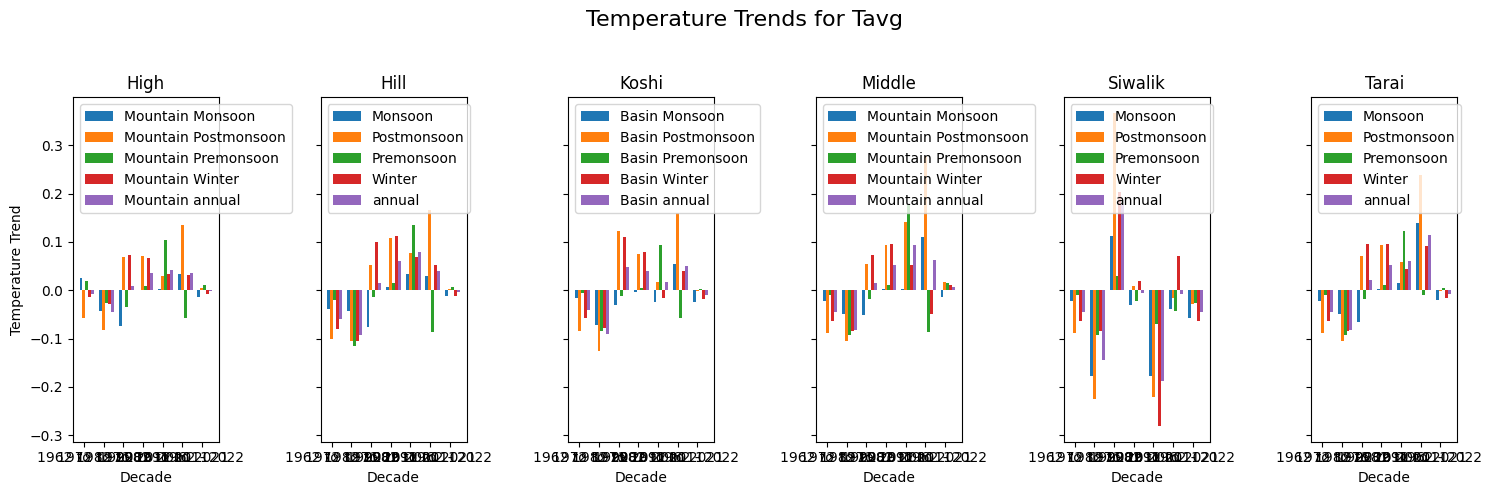

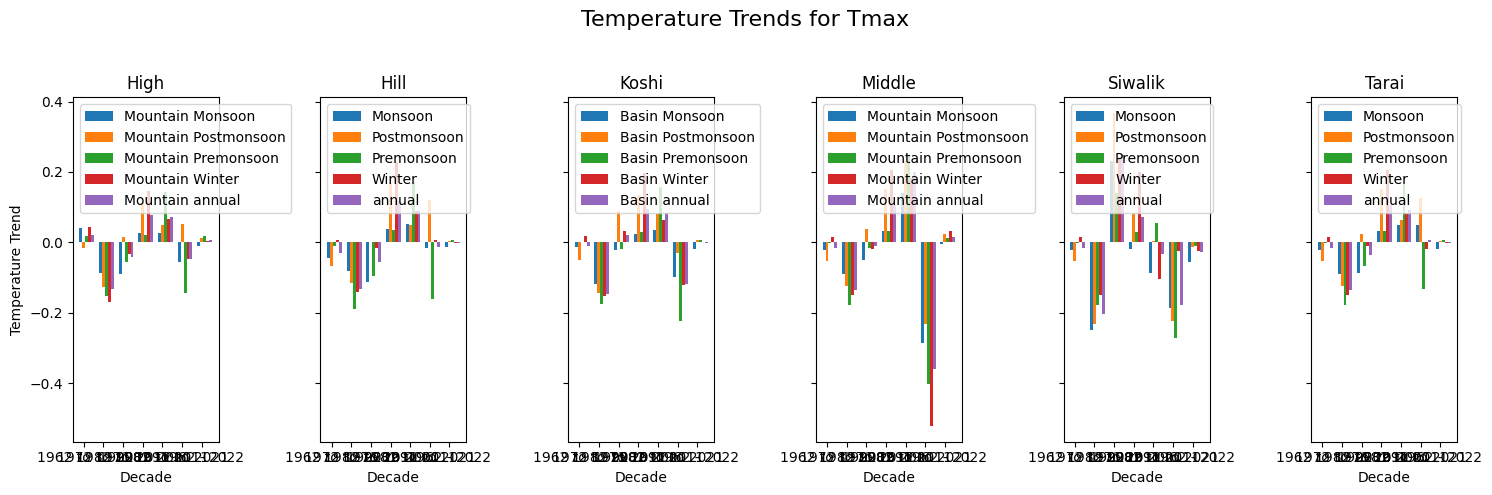

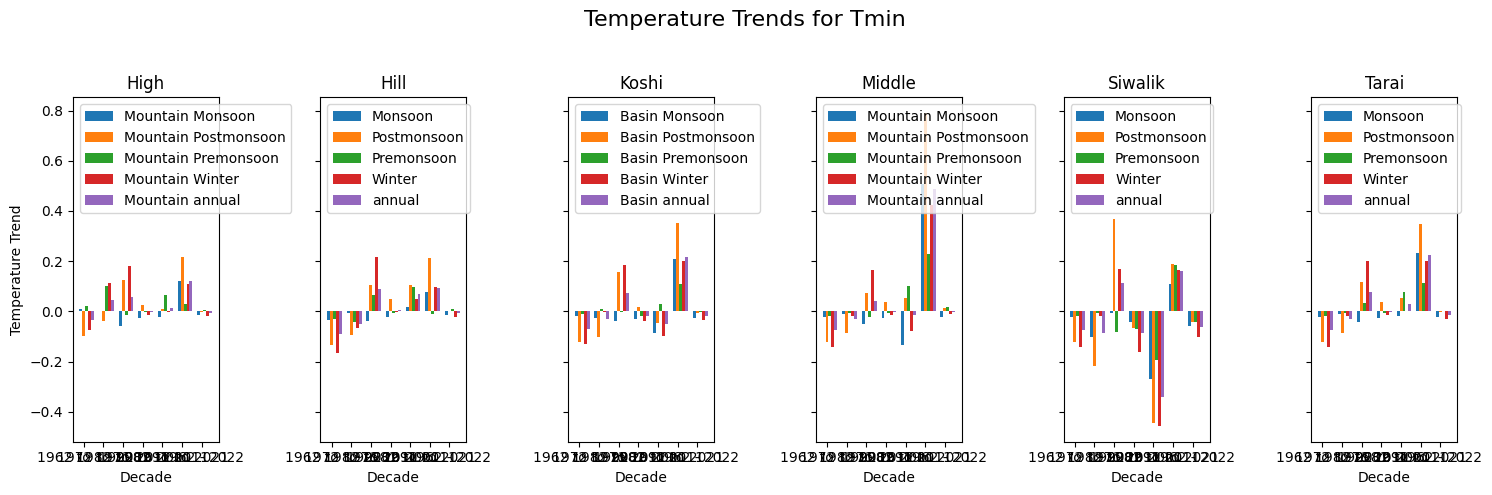

In [15]:
# Unique Temperature Types and Regions
temperature_types = df['Temperature_Type'].unique()
regions = df['Region'].unique()
decades = ['1962 to 1971', '1972 to 1981', '1982 to 1991', ' 1992 to 2001',
    '2002 to 2011', '2012 to 2021', '1962 - 2022']  # You can add more decades as needed


# Plot for each Temperature Type
for temp_type in temperature_types:
    fig, axes = plt.subplots(1, len(regions), figsize=(15, 5), sharey=True)
    fig.suptitle(f'Temperature Trends for {temp_type}', fontsize=16)
    
    # Filter data for the specific Temperature Type
    temp_data = df[df['Temperature_Type'] == temp_type]
    
    # Plot for each Region
    for i, region in enumerate(regions):
        region_data = temp_data[temp_data['Region'] == region]
        
        # Set up the positions for the bars
        x = np.arange(len(decades))  # x-axis for decades
        width = 0.15  # Width of each bar group
        
        # Create a bar plot for each Season within the region subplot
        for j, season in enumerate(region_data['Season'].unique()):
            season_data = region_data[region_data['Season'] == season]
            bar_values = season_data[decades].values.flatten()
            
            # Plot the bars, offsetting by season index j
            axes[i].bar(x + j*width, bar_values, width, label=season)
        
        # Set subplot title and labels
        axes[i].set_title(f'{region}')
        axes[i].set_xticks(x + width)  # Adjusting to center labels
        axes[i].set_xticklabels(decades)
        axes[i].set_xlabel('Decade')
        if i == 0:
            axes[i].set_ylabel('Temperature Trend')
        axes[i].legend(loc='upper left')
    
    # Adjust layout and show plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
